# 1. Functions, libraries and packeges

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [56]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [57]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('johnsmith88/heart-disease-dataset', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [58]:
df = pd.read_csv(r'data\heart.csv')

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 2. Model
 - There is no EDA and feture engineering (dataset preprepared)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((656, 13), (164, 13), (205, 13))

## 2.1 Scale Insensitive models

In [62]:
from sklearn.ensemble import RandomForestClassifier

forrest = RandomForestClassifier(random_state = 42)
forrest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

## 2.2 Scale sensitive

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [67]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

## 2.3 Evaluation

### 2.3.1 Accuracy

In [69]:
forrest.score(X_val, y_val)

0.9939024390243902

In [70]:
nb_clf.score(X_val, y_val)

0.8658536585365854

In [71]:
gb_clf.score(X_val, y_val)

0.975609756097561

In [72]:
knn.score(X_val_scaled, y_val)

0.8719512195121951

In [73]:
log.score(X_val_scaled, y_val)

0.9024390243902439

In [74]:
svc.score(X_val_scaled, y_val)

0.9512195121951219

### 2.3.2 Recall

- It is not that bad if I say that someone has heart disease and actually does not have
- Problem is If someone is healthy and actually has heart disease

In [75]:
# Accuracy: 100 --> 80 --> 80%
# Precision: 200 --> 200 has problem --> 100 actually have --> 50%
# Recall: 100 pations with problem --> 100%

In [76]:
from sklearn.metrics import recall_score

In [77]:
y_preds = forrest.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for Random Forest: {y_recall}')

y_preds = nb_clf.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for NB: {y_recall}')


y_preds = gb_clf.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for GB: {y_recall}')

Recall score for Random Forest: 1.0
Recall score for NB: 0.9285714285714286
Recall score for GB: 0.9880952380952381


In [78]:
y_preds = knn.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for KNN: {y_recall}')

y_preds = log.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for LOG: {y_recall}')


y_preds = svc.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for SVC: {y_recall}')

Recall score for KNN: 0.9166666666666666
Recall score for LOG: 0.9761904761904762
Recall score for SVC: 0.9642857142857143


### 2.3.3 ROC curve

In [79]:
from sklearn.metrics import roc_auc_score, roc_curve

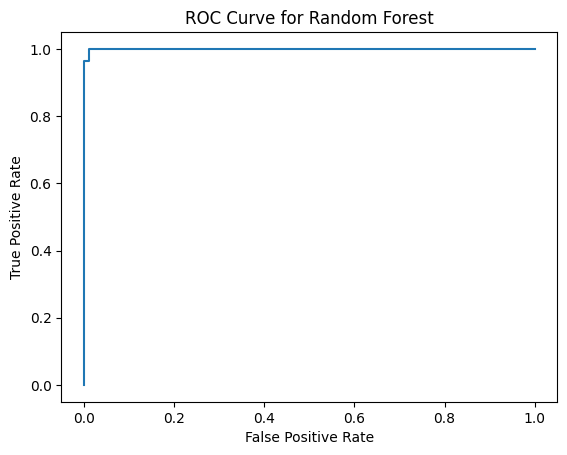

In [80]:
y_probs = forrest.predict_proba(X_val)[:, 1]

fpr,tpr, thresholds = roc_curve(y_val,y_probs)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()


In [81]:
# to get 100% true positive rate, we get 5% false positive rate-->chart

In [82]:
roc_auc = roc_auc_score(y_val, y_probs)
roc_auc


np.float64(0.9995535714285714)

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



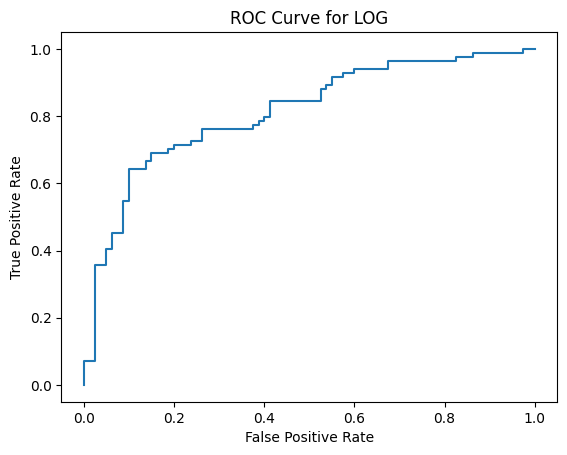

In [83]:
y_probs = log.predict_proba(X_val)[:, 1]

fpr,tpr, thresholds = roc_curve(y_val,y_probs)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LOG')
plt.show()

# 2.4 Hyperparameter tunning

### 2.4.1 GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [86]:
model_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=model_forest,
                            param_grid=param_grid,
                            cv=3,
                            verbose=2,
                            n_jobs=-1)

In [87]:
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
print("Best parameters found: ",grid_best_params)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 2.4.2 Optuna

In [88]:
import optuna
import plotly

In [89]:
def objective(trial):
    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 301, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 31, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 11, step=1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 11, step=1),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
    }

    model = RandomForestClassifier(**parameters, random_state=42, n_jobs=-1)

    model.fit(X_train, y_train)

    predictions = model.predict(X_val)
    y_probs = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_probs)



In [90]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50,n_jobs=-1)

[I 2025-05-24 16:42:40,494] A new study created in memory with name: no-name-f7c3c6bc-6d5f-470f-b17c-f4c791d97bac
C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [100, 301] and step=100, but the range is not divisible by `step`. It will be replaced by [100, 300].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 31] and step=5, but the range is not divisible by `step`. It will be replaced by [5, 30].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [100, 301] and step=100, but the range is not divisible by `step`. It will be replaced by [100, 300].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 31] and step=5, but the range

In [91]:
optuna.visualization.plot_optimization_history(study)

In [92]:
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [93]:
optuna.visualization.plot_param_importances(study)

In [94]:
def objective2(trial):
    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 601, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 41, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15, step=1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 11, step=1),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
    }

    model = RandomForestClassifier(**parameters, random_state=42, n_jobs=-1)

    model.fit(X_train, y_train)

    predictions = model.predict(X_val)
    y_probs = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_probs)

In [95]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=50, n_jobs=-1)

[I 2025-05-24 16:43:19,075] A new study created in memory with name: no-name-e99579dc-59c6-4fd7-9d89-f94a5224b044
C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [100, 601] and step=100, but the range is not divisible by `step`. It will be replaced by [100, 600].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 41] and step=5, but the range is not divisible by `step`. It will be replaced by [5, 40].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [100, 601] and step=100, but the range is not divisible by `step`. It will be replaced by [100, 600].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 41] and step=5, but the range

In [96]:
fig = optuna.visualization.plot_parallel_coordinate(study2)
fig.show()

In [97]:
def objective3(trial):
    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 301, step=20),
        'max_depth': trial.suggest_int('max_depth', 5, 41, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15, step=1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 11, step=1),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
    }

    model = RandomForestClassifier(**parameters, random_state=42, n_jobs=-1)

    model.fit(X_train, y_train)

    predictions = model.predict(X_val)
    y_probs = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_probs)

In [98]:
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, n_trials=50,n_jobs=-1)

[I 2025-05-24 16:44:15,486] A new study created in memory with name: no-name-11e28533-5de4-44b4-8779-09c790080f05
C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [20, 301] and step=20, but the range is not divisible by `step`. It will be replaced by [20, 300].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 41] and step=5, but the range is not divisible by `step`. It will be replaced by [5, 40].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [20, 301] and step=20, but the range is not divisible by `step`. It will be replaced by [20, 300].

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [5, 41] and step=5, but the range is no

In [99]:
optuna.visualization.plot_param_importances(study3)

In [100]:
fig = optuna.visualization.plot_parallel_coordinate(study3)
fig.show()

# 3. Final Model

In [109]:
model_grid = RandomForestClassifier(**grid_best_params, random_state=42, n_jobs=-1)
model_study = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
model_study2 = RandomForestClassifier(**study2.best_params, random_state=42, n_jobs=-1)
model_study3 = RandomForestClassifier(**study3.best_params, random_state=42, n_jobs=-1)

In [110]:
X = pd.concat([X_train,X_val])
y = pd.concat([y_train,y_val])

In [111]:
model_grid.fit(X, y)
model_study.fit(X, y)
model_study2.fit(X, y)
model_study3.fit(X, y)

RandomForestClassifier(max_depth=35, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=120, n_jobs=-1, random_state=42)

In [112]:
model_grid_predictions = model_grid.predict(X_test)
model_study_predictions = model_study.predict(X_test)
model_study2_predictions = model_study2.predict(X_test)
model_study3_predictions = model_study3.predict(X_test)

In [115]:
y_grid_probs = model_grid.predict_proba(X_test)[:, 1]
y_study_probs = model_study.predict_proba(X_test)[:, 1]
y_study2_probs = model_study2.predict_proba(X_test)[:, 1]
y_study3_probs = model_study3.predict_proba(X_test)[:, 1]
roc_auc_grid = roc_auc_score(y_test, y_grid_probs)
roc_auc_study = roc_auc_score(y_test, y_study_probs)
roc_auc_study2 = roc_auc_score(y_test, y_study2_probs)
roc_auc_study3 = roc_auc_score(y_test, y_study3_probs)


In [117]:
grid_recall = recall_score(y_test, model_grid_predictions)
study_recall = recall_score(y_test, model_study_predictions)
study2_recall = recall_score(y_test, model_study2_predictions)
study3_recall = recall_score(y_test, model_study3_predictions)
print(f'Grid Search ROC AUC: {roc_auc_grid}, Recall: {grid_recall}')
print(f'Optuna Study ROC AUC: {roc_auc_study}, Recall: {study_recall}')
print(f'Optuna Study2 ROC AUC: {roc_auc_study2}, Recall: {study2_recall}')
print(f'Optuna Study3 ROC AUC: {roc_auc_study3}, Recall: {study3_recall}')

Grid Search ROC AUC: 1.0, Recall: 0.970873786407767
Optuna Study ROC AUC: 0.9957167332952599, Recall: 0.970873786407767
Optuna Study2 ROC AUC: 0.9977155910908053, Recall: 0.970873786407767
Optuna Study3 ROC AUC: 0.9977155910908053, Recall: 0.970873786407767


In [116]:
print(f'ROC AUC for Grid Search: {roc_auc_grid}')
print(f'ROC AUC for Optuna Study: {roc_auc_study}')
print(f'ROC AUC for Optuna Study 2: {roc_auc_study2}')
print(f'ROC AUC for Optuna Study 3: {roc_auc_study3}')

ROC AUC for Grid Search: 1.0
ROC AUC for Optuna Study: 0.9957167332952599
ROC AUC for Optuna Study 2: 0.9977155910908053
ROC AUC for Optuna Study 3: 0.9977155910908053


In [120]:
print(f'The best model is Random Forest with GRID Search parameters: {grid_best_params}')

The best model is Random Forest with GRID Search parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# 4. Feature analysis

In [121]:
importances = model_grid.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

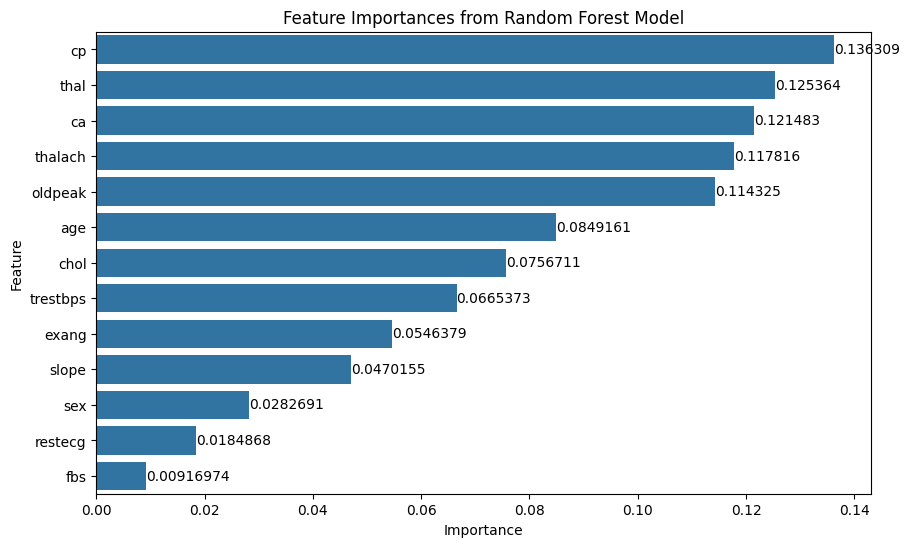

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.bar_label = plt.bar_label(plt.gca().containers[0])
plt.show()

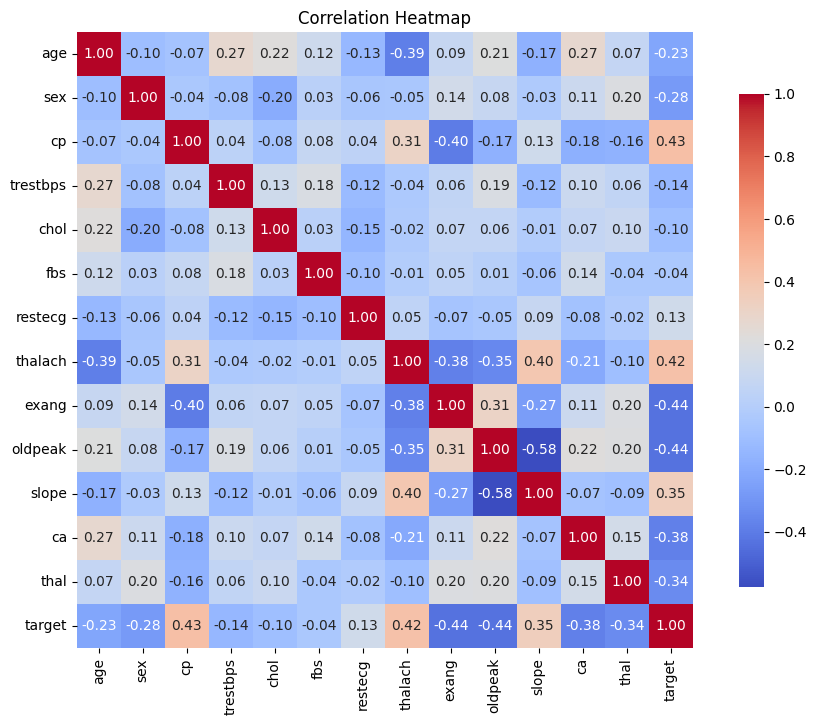

In [124]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [125]:
# The biggest correlation with target is the chest pain type, tchalach and negtiv correlation with exang and oldpeak